**Introduction to CNN**
- ConvNet
- Max Pooling
- Fully Connected Layer
- Softmax

### > **Do upvote if you find this notebook helpful.****

In [1]:
##importing required libraries
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
get_ipython().magic('matplotlib inline')
np.random.seed(1)
import cv2
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
##printing version of tensorflow
print(tf.__version__)

2.3.0


## Read data and converting pandas dataframe into images array
Splitting labeled data into train and val

In [2]:
train_path="../input/mnist-in-csv/mnist_train.csv"
test_path="../input/mnist-in-csv/mnist_test.csv"
train = pd.read_csv(train_path)
print(train.shape)
print(train.head())
test= pd.read_csv(test_path)
print(test.shape)
print(test.head())


(60000, 785)
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(10000, 785)
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ..

In [3]:
# put labels into y_train variable
y_orig1 = train["label"]
y_orig1_test = test["label"]
# Drop 'label' column
X_orig2 = train.drop(labels = ["label"],axis = 1,inplace=False)
X_orig2_test = test.drop(labels = ["label"],axis = 1,inplace=False)


1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64

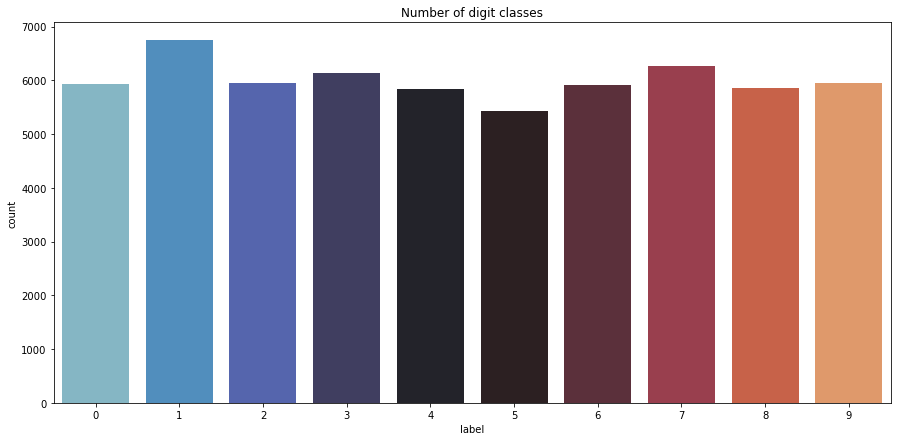

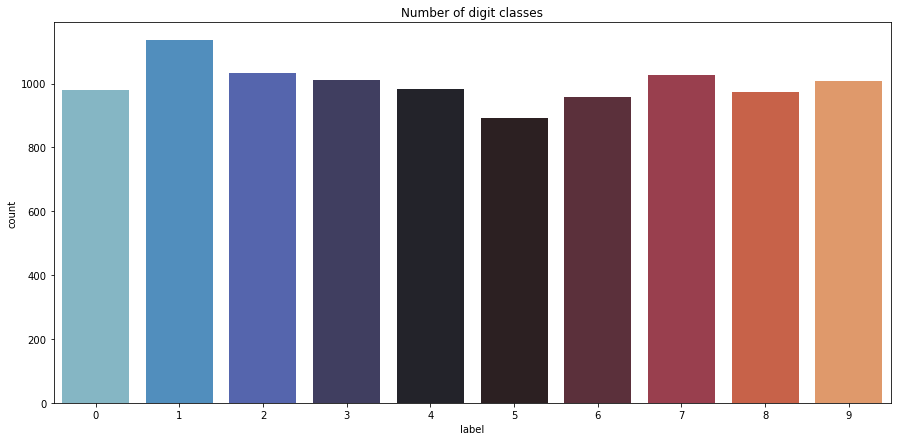

In [4]:
# visualize number of digits classes
import seaborn as sns
plt.figure(figsize=(15,7))
g = sns.countplot(y_orig1, palette="icefire")
plt.title("Number of digit classes")
y_orig1.value_counts()

# visualize number of digits classes
import seaborn as sns
plt.figure(figsize=(15,7))
g = sns.countplot(y_orig1_test, palette="icefire")
plt.title("Number of digit classes")
y_orig1_test.value_counts()


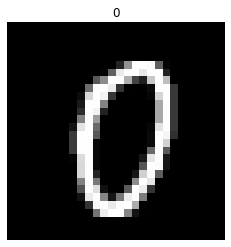

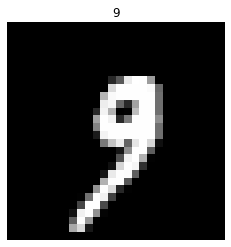

In [5]:
# Example of a picture
index = 1000
img = X_orig2.iloc[index].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_orig1[index])
plt.axis("off")
plt.show()

# Example of a picture
index = 1000
img = X_orig2_test.iloc[index].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_orig1_test[index])
plt.axis("off")
plt.show()


## Normaliation, Reshape and Label Encoding
- Normalization
  - We perform a grayscale normalization to reduce the effect of illumination's differences.
  - If we perform normalization, CNN works faster.
- Reshape
  - Train and test images (28 x 28)
  - We reshape all data to 28x28x1 3D matrices.
  - Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
- Label Encoding
  - Encode labels to one hot vectors
    - 2 => [0,0,1,0,0,0,0,0,0,0]
    - 4 => [0,0,0,0,1,0,0,0,0,0]

In [6]:
# Normalize the data
X_orig1 = X_orig2 / 255.0
X_orig1_test = X_orig2_test / 255.0
print("x_orig1 shape: ",X_orig1.shape)
print("x_orig1_test shape: ",X_orig1_test.shape)

# Reshape
X_orig = X_orig1.values.reshape(-1,28,28,1)
X_orig_test = X_orig1_test.values.reshape(-1,28,28,1)
print("x_orig shape: ",X_orig.shape)
print("x_orig_test shape: ",X_orig_test.shape)

# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
print("old y_orig1 shape: ", y_orig1.shape)
y_orig = to_categorical(y_orig1, num_classes = 10)
print("y_orig shape: ",y_orig.shape)

print("old y_orig1_test shape: ", y_orig1_test.shape)
y_orig_test = to_categorical(y_orig1_test, num_classes = 10)
print("y_orig_test shape: ",y_orig_test.shape)


x_orig1 shape:  (60000, 784)
x_orig1_test shape:  (10000, 784)
x_orig shape:  (60000, 28, 28, 1)
x_orig_test shape:  (10000, 28, 28, 1)
old y_orig1 shape:  (60000,)
y_orig shape:  (60000, 10)
old y_orig1_test shape:  (10000,)
y_orig_test shape:  (10000, 10)


## Train Test split
- We split the data into train and test sets.
- test size is 20%.
- train size is 80%.


In [7]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_orig, y_orig, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)


x_train shape (48000, 28, 28, 1)
x_val shape (12000, 28, 28, 1)
y_train shape (48000, 10)
y_val shape (12000, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


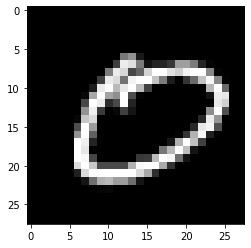

In [8]:
# Some examples
index=1
print(Y_train[index])
plt.imshow(X_train[index][:,:,0],cmap='gray')
plt.show()


## Model -  Convolutional Neural Network

### Convoluation Operation
- We have some image and feature detector(3*3)
- Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
- Feature detector = kernel = filter
- Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
- feature map = conv(input image, feature detector). Element wise multiplication of matrices.
- feature map = convolved feature
- Stride = navigating in input image.
- We reduce the size of image by setting the value of stride more than 1. This is important because code runs faster but we loose information.
- We create multiple feature maps because we use multiple feature detectors(filters).
- After having convolution layer we use ReLU to break up linearity.
- **tf.nn.conv2d(X,W, strides = [1,s,s,1], padding = 'SAME'):** given an input $X$ and a group of filters $W$, this function convolves $W$'s filters on X. The third parameter ([1,s,s,1]) represents the strides for each dimension of the input (m, n_H_prev, n_W_prev, n_C_prev). Normally, you'll choose a stride of 1 for the number of examples (the first value) and for the channels (the fourth value), which is why we wrote the value as `[1,s,s,1]`. You can read the full documentation on [conv2d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

![picture](https://miro.medium.com/max/1462/1*ROh_38pysewuh6fVPQpxFQ.png)


### Same Padding
- As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
- input size and output size are same.

![picture](https://miro.medium.com/max/666/1*noYcUAa_P8nRilg3Lt_nuA.png)


### Max Pooling
- It makes down-sampling or sub-sampling (Reduces the number of parameters)
- It makes the detection of features invariant to scale or orientation changes.
- It reduce the amount of parameters and computation in the network, and hence to also control overfitting.
- **tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), strides=None,padding='valid', data_format=None)** given an input A, this function uses a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.  For max pooling, we usually operate on a single example at a time and a single channel at a time.  So the first and fourth value in `[1,f,f,1]` are both 1.  You can read the full documentation on [max_pool](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool3D).

![picture](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png)


### Flattening
- For example, given a tensor with dimensions [100,2,3,4], it flattens the tensor to be of shape [100, 24], where 24 = 2 * 3 * 4.  You can read the full documentation on [flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

![picture](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_2.png)


### Fully Connected(FC)/Dense
- Neurons in a fully connected layer have connections to all activations in the previous layer
- Artificial Neural Network
- **tf.keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=None, bias_regularizer=None,activity_regularizer=None,kernel_constraint=None, bias_constraint=None:** 
- given the flattened input,F, it returns the output computed using a fully connected layer. You can read the full documentation on [fully_connected](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

![picture](https://static.packt-cdn.com/products/9781788996242/graphics/451a22fa-7568-4602-a522-e2dd3826e53e.png)


### Using Keras
- Implement the `forward_propagation` function below to build the following model: `CONV2D -> MAXPOOL -> CONV2D -> MAXPOOL -> FLATTEN -> FULLYCONNECTED -> FULLYCONNECTED`. You should use the functions above.

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

## Define Optimizer
- Adam Optimizer

In [10]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Compile Model

- optimizer - Adam
- loss - categorical cross entropy
- metrics - accuracy

![picture](https://gombru.github.io/assets/cross_entropy_loss/softmax_CE_pipeline.png)

In [11]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Epochs and Batch Size
- Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.

In [12]:
epochs = 10  # for better result increase the epochs
batch_size = 200

## Fit the model



In [13]:
%%time
history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=epochs
                    ,shuffle=True,steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
240/240 [==============================] - 2s 7ms/step - loss: 0.3312 - accuracy: 0.9095 - val_loss: 0.1012 - val_accuracy: 0.9715
Epoch 2/10
240/240 [==============================] - 2s 6ms/step - loss: 0.0862 - accuracy: 0.9743 - val_loss: 0.0808 - val_accuracy: 0.9747
Epoch 3/10
240/240 [==============================] - 2s 6ms/step - loss: 0.0608 - accuracy: 0.9814 - val_loss: 0.0563 - val_accuracy: 0.9832
Epoch 4/10
240/240 [==============================] - 1s 6ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0501 - val_accuracy: 0.9845
Epoch 5/10
240/240 [==============================] - 1s 6ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0512 - val_accuracy: 0.9848
Epoch 6/10
240/240 [==============================] - 2s 8ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0442 - val_accuracy: 0.9872
Epoch 7/10
240/240 [==============================] - 1s 6ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0408 - val_accuracy: 0.9894
Epoch 

## Model Evaluation
- val Loss visualization
- Confusion matrix

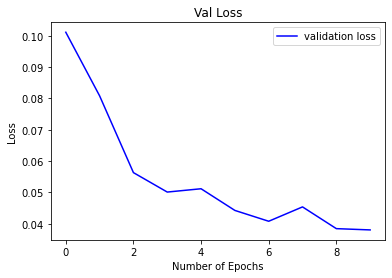

In [14]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Val Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


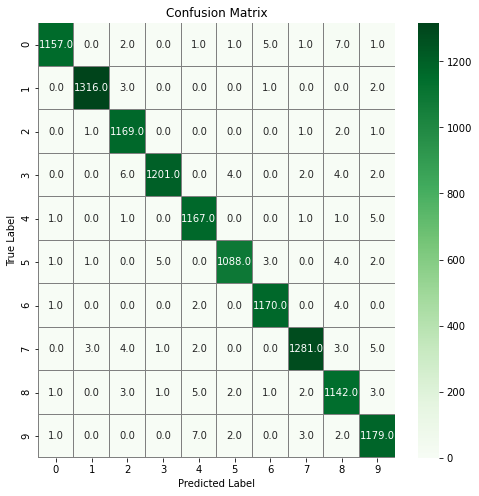

In [15]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [16]:
### Printing classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(Y_true, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99      1175
     class 1       1.00      1.00      1.00      1322
     class 2       0.98      1.00      0.99      1174
     class 3       0.99      0.99      0.99      1219
     class 4       0.99      0.99      0.99      1176
     class 5       0.99      0.99      0.99      1104
     class 6       0.99      0.99      0.99      1177
     class 7       0.99      0.99      0.99      1299
     class 8       0.98      0.98      0.98      1160
     class 9       0.98      0.99      0.98      1194

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [17]:
##Accuracy Score
from sklearn.metrics import accuracy_score
print("Accuracy on val sample is: %f" %(accuracy_score(Y_true, Y_pred_classes)))

Accuracy on val sample is: 0.989167


## Test the model
We will now test the model on some random test data set. We will first construct the image of the number from the test data and then run our classifier to verify if it could identify it correctly.


7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


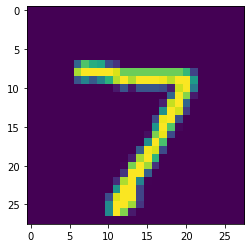

In [18]:
Y_pred_test = model.predict(X_orig_test)
Y_pred_classes_test = np.argmax(Y_pred_test,axis = 1)

image = X_orig_test[0].reshape( 28, 28)
plt.imshow(image)
print(Y_pred_classes_test[0])
Y_true_test = np.argmax(y_orig_test,axis = 1)
print(y_orig_test[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


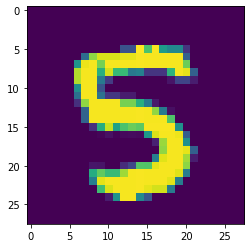

In [19]:
i = 120
image = X_orig_test[i].reshape( 28, 28)
plt.imshow(image)
print(Y_pred_classes_test[i])
print(y_orig_test[i])

In [20]:
##Accuracy Score
from sklearn.metrics import accuracy_score
print("Accuracy on test sample is: %f" %(accuracy_score(Y_true_test, Y_pred_classes_test)))

Accuracy on test sample is: 0.990900


In [21]:
### Printing classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(Y_true_test, Y_pred_classes_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       980
     class 1       1.00      1.00      1.00      1135
     class 2       0.99      0.99      0.99      1032
     class 3       0.99      0.99      0.99      1010
     class 4       0.99      0.99      0.99       982
     class 5       0.99      0.99      0.99       892
     class 6       1.00      0.99      0.99       958
     class 7       0.99      0.99      0.99      1028
     class 8       0.98      0.99      0.99       974
     class 9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



As we can see in the above examples we are getting the right prediction on test data.
We are able to get almost **99% accuracy** on both **val** and **test** dataset.